In [257]:
import PIL #library pour afficher des images à partir d'url
import wikipedia
import requests  
import re
from bs4 import BeautifulSoup
# Import libraries
import pywikibot
import pandas as pd
import mwparserfromhell
import numpy as np
from scipy.spatial import distance
from nltk.tokenize import word_tokenize
import pandas as pd

from tqdm import tqdm
tqdm.pandas()
import time

import string as str
import matplotlib.pyplot as plt

In [286]:
#Define every dataframe for Climate change we'll need
df = pd.read_csv('climatechange(2).csv')
df_title = df[df['Name only'].str.contains('climate change', case = False)]
df_title_regional = df_title[df_title['Name only'].str.contains('climate change in', case = False)]
df_title_non_regional = df_title[df_title['Name only'].str.contains('climate change in', case = False) == False]
df_sections = df[df['Name only'].str.contains('climate change', case = False) == False]

In [289]:
df_title

,Unnamed: 0,Name only,page url,text,citations,Ref count,nb_journal_citations,journalcitation,journal,nbjournaldetected,...,Page id,Edit protection,Page lenght (Bytes),DOB,Creator,Total edits,Recent edits,Formated DOB,Year_month,Year
0,0,Effects of climate change,https://en.wikipedia.org/wiki/Effects_of_clima...,{{short description|Effects created by climate...,"{'Ref count': 252, 'journal_count': 56, 'nb_jo...",252,58,"['10.1038/s41558-019-0412-1', '10.1126/sciadv....","[['nature climate change '], ['science advance...",56,...,2119174,Require autoconfirmed or confirmed access (no ...,186539,26 June 2005,Rd232,5538,17,2005-06-26,2005-06,2005
1,1,Effects of climate change on agriculture,https://en.wikipedia.org/wiki/Effects_of_clima...,{{short description|None}}\n{{about||contribut...,"{'Ref count': 142, 'journal_count': 49, 'nb_jo...",142,51,"['10.1016/s0169-5347(02)02587-9', '10.1007/s10...","[['trends in ecology '], ['climatic change'], ...",49,...,47512577,Allow all users (no expiry set),115616,13 August 2015,Jarble,288,118,2015-08-13,2015-08,2015
2,2,Effects of climate change on human health,https://en.wikipedia.org/wiki/Effects_of_clima...,[[File:Atlanta thermal.jpg|thumb|Illustration ...,"{'Ref count': 111, 'journal_count': 56, 'nb_jo...",111,56,"['10.1016/j.foreco.2009.09.002', '10.1111/j.17...","[['forest ecology and management '], ['[[inter...",56,...,37063005,Allow all users (no expiry set),91158,19 September 2012,Ppowers29,1117,23,2012-09-19,2012-09,2012
3,3,Effects of climate change on oceans,https://en.wikipedia.org/wiki/Effects_of_clima...,{{Short description|Effects of climate change ...,"{'Ref count': 121, 'journal_count': 63, 'nb_jo...",121,66,"['10.1146/annurev-environ-012320-083019', '10....",[['annual review of environment and resources ...,63,...,35895879,Allow all users (no expiry set),97693,21 May 2012,Antblasko,539,12,2012-05-21,2012-05,2012
4,4,Effects of climate change on ecosystems,https://en.wikipedia.org/wiki/Effects_of_clima...,{{short description|How increased greenhouse g...,"{'Ref count': 86, 'journal_count': 48, 'nb_jou...",86,49,"['10.1073/pnas.0502286102', '10.1111/j.1752-45...",[['proceedings of the national academy of scie...,48,...,26515241,Allow all users (no expiry set),59046,11 March 2010,Enescot,399,27,2010-03-11,2010-03,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,212,"Climate Change: Global Risks, Challenges and D...",https://en.wikipedia.org/wiki/Climate_Change:_...,{{Use dmy dates|date=December 2018}}\n\n'''Cli...,"{'Ref count': 17, 'journal_count': 1, 'nb_jour...",17,1,"['10.1088/1755-1307/6/6/062007', None, None]",[[' iop conference series']],1,...,21890764,Allow all users (no expiry set),15030,9 March 2009,Andrewjlockley,121,0,2009-03-09,2009-03,2009
213,213,Illustrative model of greenhouse effect on cli...,https://en.wikipedia.org/wiki/Illustrative_mod...,{{Textbook|date=February 2022}}\n{{Short descr...,"{'Ref count': 11, 'journal_count': 0, 'nb_jour...",11,2,[],[],0,...,65937796,Allow all users (no expiry set),25264,25 November 2020,Dan Gluck,36,1,2020-11-25,2020-11,2020
214,214,Debate over China's economic responsibilities ...,https://en.wikipedia.org/wiki/Debate_over_Chin...,{{Tone|date=August 2009}}\n\n{{Cleanup rewrite...,"{'Ref count': 35, 'journal_count': 1, 'nb_jour...",35,1,"['10.1126/science.1153368', '18258882', None]",[[' [[science ']],1,...,16374739,Allow all users (no expiry set),29669,18 March 2008,CathCarey,339,4,2008-03-18,2008-03,2008
215,215,Climate change litigation and the California E...,https://en.wikipedia.org/wiki/Climate_change_l...,Litigation related to [[climate change]] and ...,"{'Ref count': 52, 'journal_count': 0, 'nb_jour...",52,0,[],[],0,...,35475658,Allow all users (no expiry set),33148,3 April 2012,Ssoqo,209,0,2012-04-03,2012-04,2012


In [290]:
#Medieval cuisine dataframe
dm = pd.read_csv('medievalcuisine(2).csv')
#CRISPR dataframe
dc = pd.read_csv('CRISPR(1).csv')

## Growth of the corpus over time

In [291]:
d_growth = df.groupby('Year').count().cumsum()[['Name only']]
d_growth.rename({'Name only' : 'Entire corpus'}, axis = 1, inplace = True)

In [292]:
d_growth['Title corpus'] = df_title.groupby('Year').count().cumsum()['Name only']
d_growth['Section corpus'] = df_sections.groupby('Year').count().cumsum()['Name only']
d_growth['Regional subcorpus'] = df_title_regional.groupby('Year').count().cumsum()['Name only']
d_growth['Non-regional subcorpus'] = df_title_non_regional.groupby('Year').count().cumsum()['Name only']

In [293]:
d_growth

,Entire corpus,Title corpus,Section corpus,Regional subcorpus,Non-regional subcorpus
Year,,,,,
2001,65,3,62,NaN,3
2002,130,4,126,NaN,4
2003,181,5,176,NaN,5
2004,230,7,223,NaN,7
2005,309,13,296,NaN,13
2006,364,15,349,NaN,15
2007,432,24,408,4.0,20
2008,504,44,460,19.0,25
2009,547,55,492,24.0,31


Text(0, 0.5, 'Number of articles')

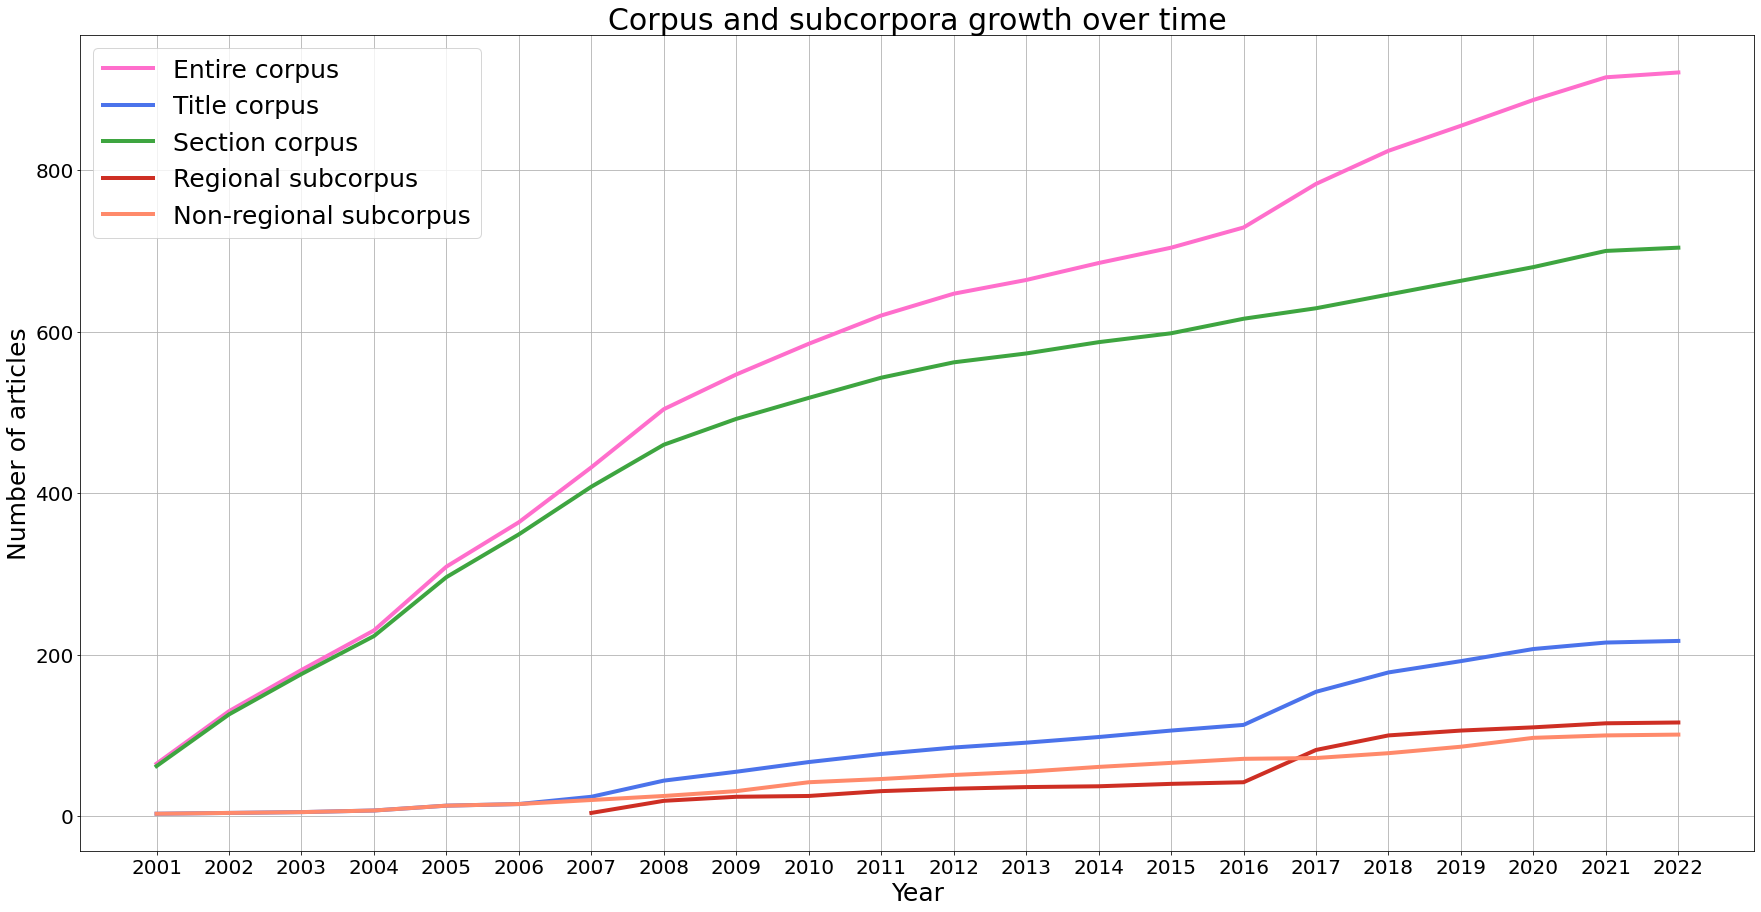

In [348]:
d_growth.plot.line(figsize = (30, 15), ylabel = 'Number of article', color = {'Entire corpus' : '#FF6ECC', 'Title corpus' : '#4B73EB', 'Regional subcorpus' : '#CE2F24', 'Non-regional subcorpus' :'#FF8A6B', 'Section corpus' : '#3EA540'}, xticks = d_growth.index, grid = True, xlabel = 'Year', fontsize = 20, linewidth = 4)
plt.title(label = 'Corpus and subcorpora growth over time', fontsize = 30)
plt.legend(fontsize = 25)
plt.xlabel(xlabel = 'Year', fontsize = 25)
plt.ylabel(ylabel = 'Number of articles', fontsize = 25)

## Edit protection

In [324]:
d_protect = df.groupby('Edit protection').count()[['Name only']]
d_protect.loc['Require autoconfirmed or confirmed access (expiry set)', 'Name only'] = 2
d_protect.drop('Require autoconfirmed or confirmed access (14:00, 3 December 2022)', axis = 0, inplace = True)
d_protect.drop('Require autoconfirmed or confirmed access (18:44, 30 December 2023)', axis = 0, inplace = True)

In [325]:
d_protect

,Name only
Edit protection,
Allow all users (no expiry set),854.0
Require administrator access (no expiry set),50.0
Require autoconfirmed or confirmed access (no expiry set),15.0
Require autoconfirmed or confirmed access (expiry set),2.0


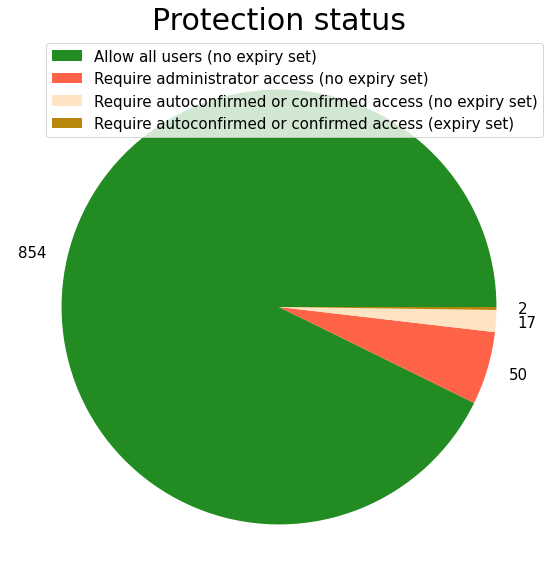

In [328]:
d_protect.plot.pie(y = 'Name only', figsize = (10, 10), colors = ['forestgreen', 'tomato', 'bisque', 'darkgoldenrod'], ylabel = '', fontsize = 15, labels = ['854', '50', '17', '2'])
plt.title('Protection status', fontsize = 30)
plt.setp(d_protect['Name only'])
plt.legend(fontsize = 15, labels = d_protect.index)

## Comparison of sources ratio between Climate change corpuses

In [298]:
d_ratio = pd.DataFrame(index = ['Entire corpus', 'Title corpus', 'Regional subcorpus', 'Non-regional subcorpus', 'Section corpus'])
d_ratio['sci'] = [df['Sci count'].median(), df_title['Sci count'].median(), df_title_regional['Sci count'].median(), df_title_non_regional['Sci count'].median(), df_sections['Sci count'].median()]
d_ratio['gov'] = [df['gov count'].median(), df_title['gov count'].median(), df_title_regional['gov count'].median(), df_title_non_regional['gov count'].median(), df_sections['gov count'].median()]
d_ratio['org'] = [df['org count'].median(), df_title['org count'].median(), df_title_regional['org count'].median(), df_title_non_regional['org count'].median(), df_sections['org count'].median()]
d_ratio['com'] = [df['com count'].median(), df_title['com count'].median(), df_title_regional['com count'].median(), df_title_non_regional['com count'].median(), df_sections['com count'].median()]
d_ratio['IPCC'] = [df['IPCC count'].median(), df_title['IPCC count'].median(), df_title_regional['IPCC count'].median(), df_title_non_regional['IPCC count'].median(), df_sections['IPCC count'].median()]
d_ratio

,sci,gov,org,com,IPCC
Entire corpus,0.125000,0.044444,0.122127,0.166667,0.000000
Title corpus,0.144330,0.058824,0.157895,0.148936,0.000000
Regional subcorpus,0.142857,0.125000,0.160645,0.207143,0.000000
Non-regional subcorpus,0.170732,0.032609,0.157895,0.112500,0.005464
Section corpus,0.120000,0.041667,0.115385,0.166667,0.000000


In [299]:
d_ratio['others'] = 1 - d_ratio.sum(axis = 1)

In [300]:
d_ratio

,sci,gov,org,com,IPCC,others
Entire corpus,0.125000,0.044444,0.122127,0.166667,0.000000,0.541762
Title corpus,0.144330,0.058824,0.157895,0.148936,0.000000,0.490016
Regional subcorpus,0.142857,0.125000,0.160645,0.207143,0.000000,0.364355
Non-regional subcorpus,0.170732,0.032609,0.157895,0.112500,0.005464,0.520800
Section corpus,0.120000,0.041667,0.115385,0.166667,0.000000,0.556282


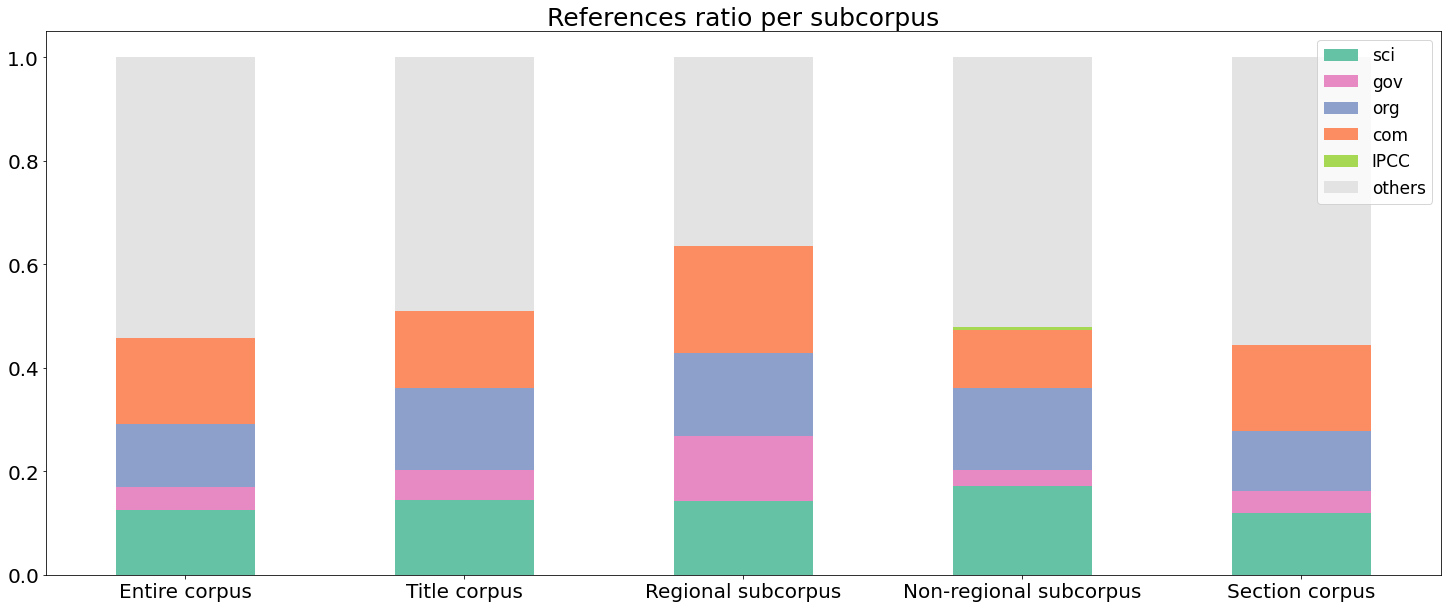

In [306]:
d_ratio.plot.bar(figsize = (25, 10), xlabel = 'Type of sources', ylabel = 'Ratio over the total number of sources', color = {"org" : "#8da0cb", "com" : "#fc8d62" , "IPCC" : "#a6d854", "gov" : "#e78ac3", "sci" : "#66c2a5", "others" : "#E3E3E3"}, stacked = True)
plt.title(label = 'References ratio per subcorpus', fontsize = 25)
plt.xticks(rotation = 0, fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel(xlabel = None)
plt.ylabel(ylabel = None)
plt.legend(fontsize = 17)

## Comparing sources ratio between corpuses (medieval cuisine + CRISPR)

### To have the tot sci score (+= IPCC) and the tot com score (+= The Guardian), run these cells

In [302]:
dc['tot com count'] = (dc['citationguardian'] + dc['citation com'])/dc['Ref count']
dc['tot sci count'] = (dc['nb_journal_citations'] + dc['citation IPCC'])/dc['Ref count']
df['tot com count'] = (df['citationguardian'] + df['citation com'])/df['Ref count']
df['tot sci count'] = (df['nb_journal_citations'] + df['citation IPCC'])/df['Ref count']
dm['tot com count'] = (dm['citationguardian'] + dm['citation com'])/dm['Ref count']
dm['tot sci count'] = (dm['nb_journal_citations'] + dm['citation IPCC'])/dm['Ref count']

d_ratio_corpus_tot = pd.DataFrame(index = ['CRISPR', 'Effects of climate change', 'Medieval cuisine'])
d_ratio_corpus_tot['sci'] = [dc['tot sci count'].median(), df['tot sci count'].median(), dm['tot sci count'].median()]
d_ratio_corpus_tot['gov'] = [dc['gov count'].median(), df['gov count'].median(), dm['gov count'].median()]
d_ratio_corpus_tot['org'] = [dc['org count'].median(), df['org count'].median(), dm['org count'].median()]
d_ratio_corpus_tot['com'] = [dc['tot com count'].median(), df['tot com count'].median(), dm['tot com count'].median()]
d_ratio_corpus_tot

,sci,gov,org,com
CRISPR,0.835979,0.000000,0.036129,0.051587
Effects of climate change,0.142857,0.044444,0.122127,0.181385
Medieval cuisine,0.010155,0.013889,0.066667,0.312500


In [303]:
d_ratio_corpus_tot['others'] = 1 - d_ratio_corpus_tot.sum(axis = 1)

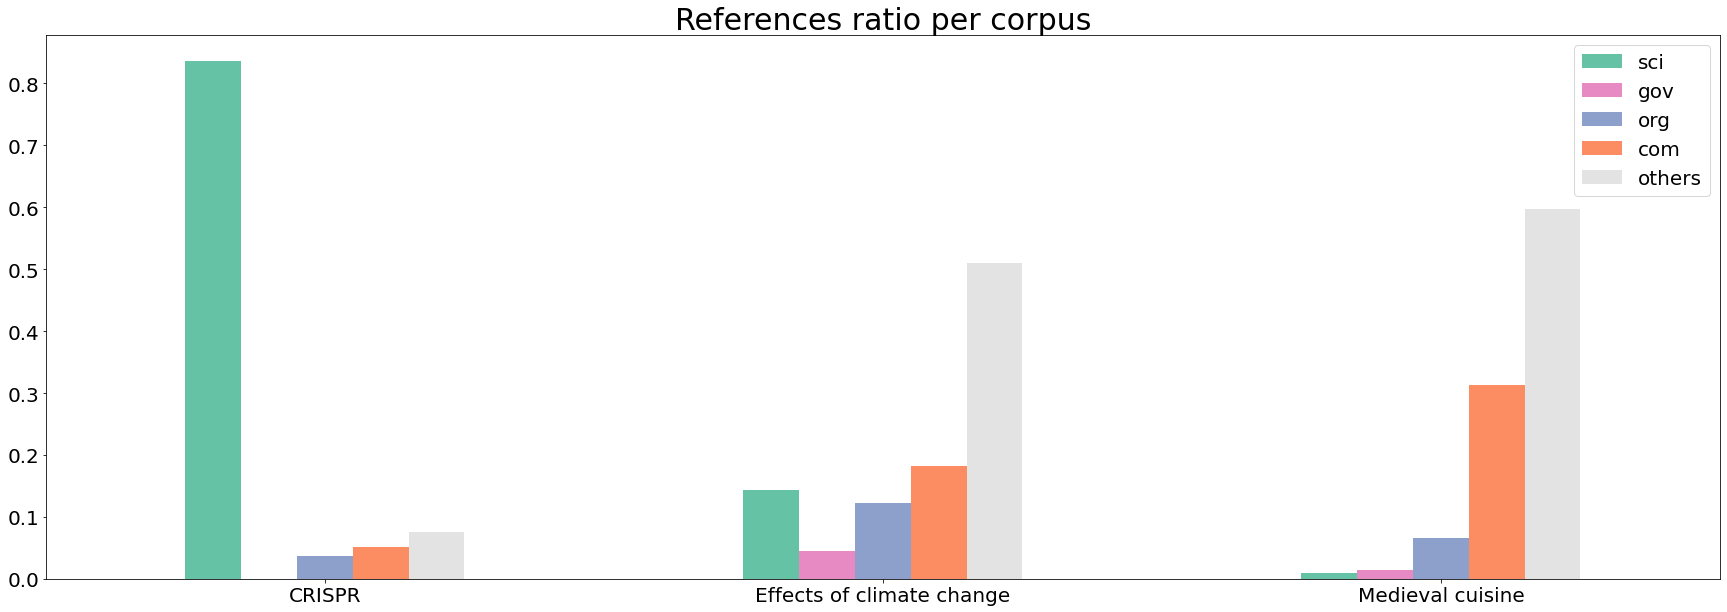

In [304]:
d_ratio_corpus_tot.plot.bar(figsize = (30, 10), color = {"org" : "#8da0cb", "com" : "#fc8d62" , "gov" : "#e78ac3", "sci" : "#66c2a5", "others" : "#E3E3E3"})
plt.xticks(rotation = 0, fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('References ratio per corpus', fontsize = 30)
plt.legend(fontsize = 20)

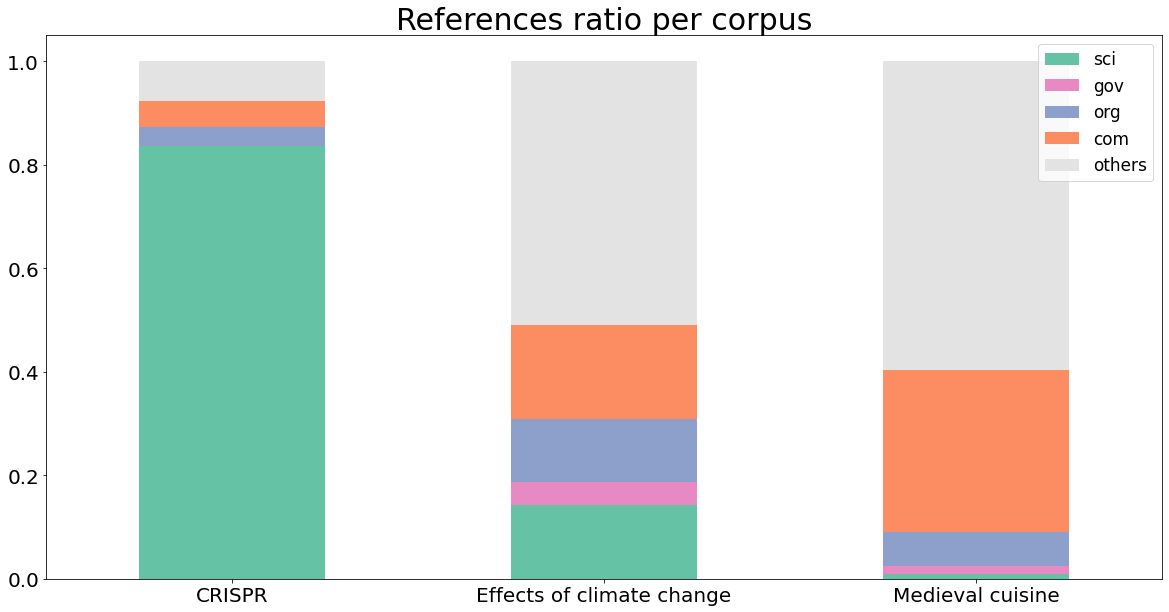

In [305]:
d_ratio_corpus_tot.plot.bar(figsize = (20, 10), color = {"org" : "#8da0cb", "com" : "#fc8d62" , "gov" : "#e78ac3", "sci" : "#66c2a5", "others" : "#E3E3E3"}, stacked = True)
plt.xticks(rotation = 0, fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('References ratio per corpus', fontsize = 30)
plt.legend(fontsize = 17)

### To have only the sci score and the com score without adding stuff, run these cells

In [23]:
d_ratio_corpus = pd.DataFrame(index = ['CRISPR', 'Effects of climate change', 'Medieval cuisine'])
d_ratio_corpus['sci'] = [dc['Sci count'].median(), df['Sci count'].median(), dm['Sci count'].median()]
d_ratio_corpus['gov'] = [dc['gov count'].median(), df['gov count'].median(), dm['gov count'].median()]
d_ratio_corpus['org'] = [dc['org count'].median(), df['org count'].median(), dm['org count'].median()]
d_ratio_corpus['com'] = [dc['com count'].median(), df['com count'].median(), dm['com count'].median()]
d_ratio_corpus

,sci,gov,org,com
CRISPR,0.812169,0.000000,0.036129,0.051587
Effects of climate change,0.125000,0.044544,0.131760,0.166667
Medieval cuisine,0.010309,0.013889,0.090909,0.300469


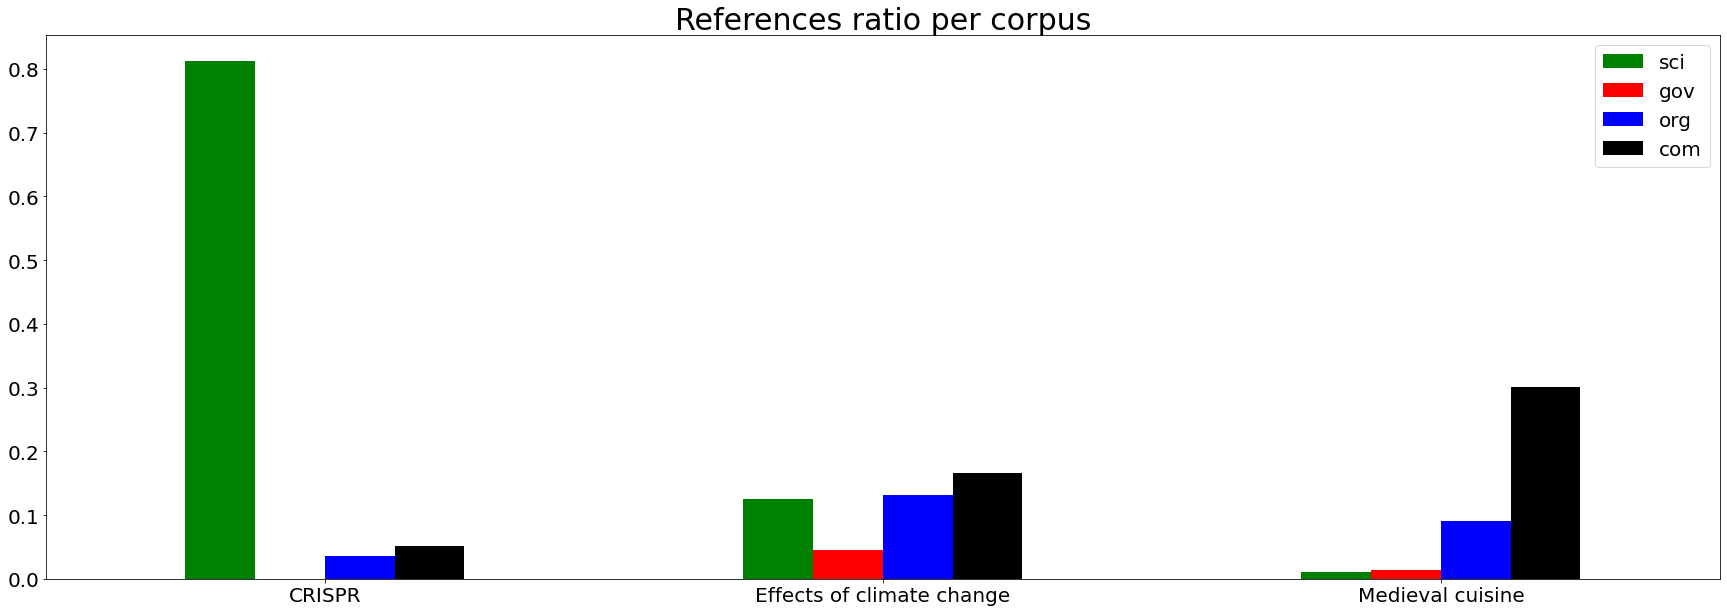

In [96]:
d_ratio_corpus.plot.bar(figsize = (30, 10), color = ['g', 'r', 'b', 'k'])
plt.xticks(rotation = 0, fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('References ratio per corpus', fontsize = 30)
plt.legend(fontsize = 20)

## Comparative growth of corpora

In [307]:
d_growth_corpus = df.groupby('Year').count().cumsum()[['Name only']]
d_growth_corpus.rename({'Name only' : 'Effects of climate change'}, axis = 1, inplace = True)

In [308]:
d_growth_corpus['CRISPR'] = dc.groupby('Year').count().cumsum()['Name only']
d_growth_corpus['Effects of climate change'] = df.groupby('Year').count().cumsum()['Name only']
d_growth_corpus['Medieval cuisine'] = dm.groupby('Year').count().cumsum()['Name only']

In [313]:
d_growth_corpus

,Effects of climate change,CRISPR,Medieval cuisine
Year,,,
2001,65,1.0,151.0
2002,130,4.0,260.0
2003,181,6.0,329.0
2004,230,10.0,429.0
2005,309,12.0,510.0
2006,364,15.0,563.0
2007,432,16.0,579.0
2008,504,17.0,596.0
2009,547,17.0,611.0


In [312]:
d_growth_corpus.loc[2022, 'Medieval cuisine'] = 684.0

Text(0, 0.5, 'Number of articles')

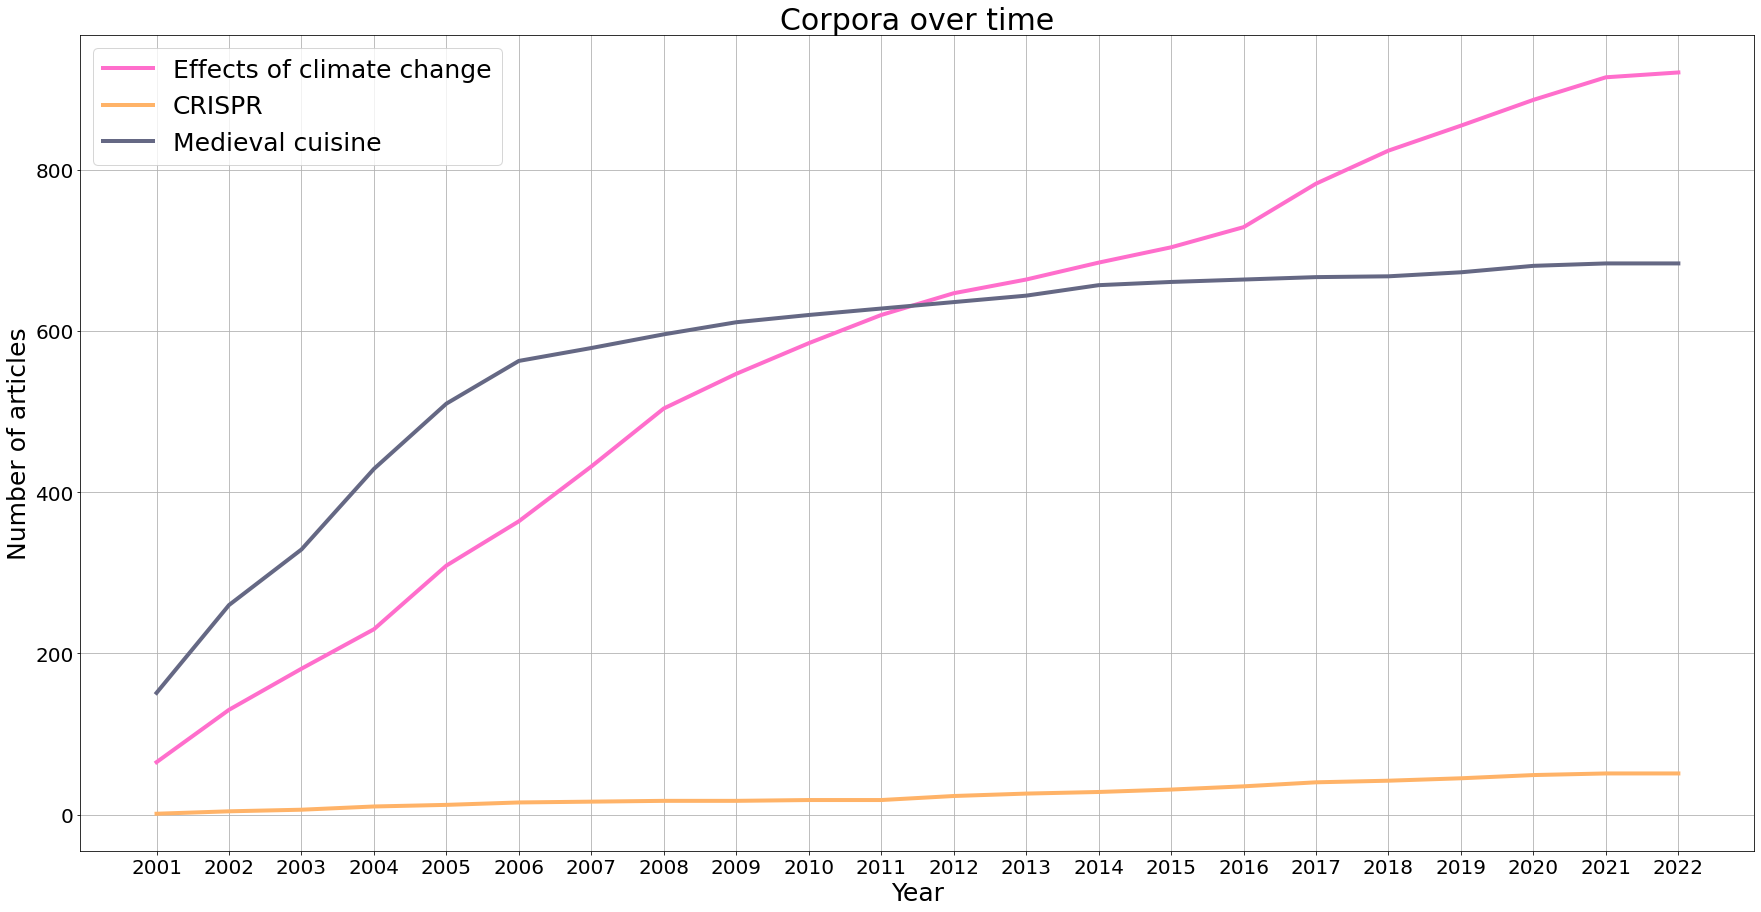

In [314]:
d_growth_corpus.plot.line(figsize = (30, 15), ylabel = 'Number of articles', color = {'Effects of climate change' : '#FF6ECC', 'CRISPR' : '#FFB368', 'Medieval cuisine' :'#656884'}, xticks = d_growth_corpus.index, grid = True, xlabel = 'Year', fontsize = 20, linewidth = 4)
plt.title(label = 'Corpora over time', fontsize = 30)
plt.legend(fontsize = 25)
plt.xlabel(xlabel = 'Year', fontsize = 25)
plt.ylabel(ylabel = 'Number of articles', fontsize = 25)

### Edit protection for corpora

In [317]:
d_protect_c = dc.groupby('Edit protection').count()[['Name only']]
d_protect_c

,Name only
Edit protection,
Allow all users (no expiry set),51


In [318]:
d_protect_m = dm.groupby('Edit protection').count()[['Name only']]
d_protect_m

,Name only
Edit protection,
Allow all users (no expiry set),534
Require administrator access (no expiry set),109
"Require autoconfirmed or confirmed access (08:20, 25 February 2023)",1
"Require autoconfirmed or confirmed access (12:50, 11 February 2023)",1
"Require autoconfirmed or confirmed access (15:14, 13 June 2022)",1
"Require autoconfirmed or confirmed access (16:47, 6 May 2023)",1
"Require autoconfirmed or confirmed access (18:07, 10 May 2023)",1
"Require autoconfirmed or confirmed access (18:26, 29 June 2023)",1
"Require autoconfirmed or confirmed access (18:42, 1 July 2022)",1


In [333]:
d_protect_m = d_protect_m.iloc[[0, 1, 10, 11]]

In [335]:
d_protect_m.loc['Require autoconfirmed or confirmed access'] = 8

C:\Users\ljouv\anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [338]:
d_protect_m

,Name only
Edit protection,
Allow all users (no expiry set),534
Require administrator access (no expiry set),109
Require autoconfirmed or confirmed access (no expiry set),27
Require extended confirmed access (no expiry set),6
Require autoconfirmed or confirmed access,8


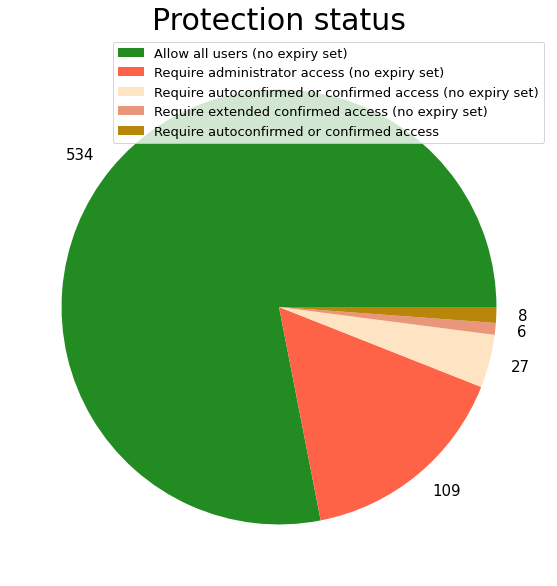

In [347]:
d_protect_m.plot.pie(y = 'Name only', figsize = (10, 10), colors = ['forestgreen', 'tomato', 'bisque', 'darksalmon', 'darkgoldenrod'], ylabel = '', fontsize = 15, labels = ['534', '109', '27', '6', '8'])
plt.title('Protection status', fontsize = 30)
plt.setp(d_protect['Name only'])
plt.legend(fontsize = 13, labels = d_protect_m.index)

In [321]:
dm[dm['Edit protection'].str.contains('administrator access', case = False)]

107                          Paris
113                          Japan
115                        Romania
119                          India
125                          Nepal
                  ...             
432    Macedonia (ancient kingdom)
435                     Icelanders
459            Ancient Macedonians
514              Culture of Odisha
605                      Gaza City
Name: Name only, Length: 109, dtype: object

## Get the protection status (foireux, pas faire attention)

In [65]:
def protection_status(data):
    
    years_off = []
    for i in range(22):
        years_off.append(2001+i)
    
    wrong_ones = []
    dot = pd.DataFrame(years_off)
    
    for article in data:

        html_text = requests.get(('https://en.wikipedia.org/wiki/Special:Log?type=protect&user=&page={}&wpdate=&tagfilter=&subtype=').format('Effects_of_climate_change')).text
        soup = BeautifulSoup(html_text, 'lxml')
        dic = {}
        results = soup.find_all('li', {'class' : 'mw-logline-protect'})
        
        for i in results:
            z = i.find('a')
            protection = i.get('data-mw-logaction')
            date = repr(z)[repr(z).find('Log">') + 5:repr(z).find('</a>')]
            dic[pd.to_datetime(date, format = '%H:%M, %d %B %Y')] = protection
        
        if 'expires' in repr(results):
            res = repr(results).split('span')
            for string in res:
                if '] (expires' in string:
                    date_get = string[string.find('] (expires ') + 11:string.find(' (UTC))')]
                    if ') [' in date_get:
                        date_get = date_get[:date_get.find(') [')]
                    if '] (' in date_get:
                        date_get = date_get[date_get.find(', '):]
                    if ')' in date_get:
                        date_get = date_get.replace(')', '')
                    if date_get[:2] == ', ':
                        date_get = date_get[2:]
                    if date_get[-1] == ' ':
                        date_get = date_get[:-1]
                    if ',' in date_get:
                        date_get = date_get.replace(',', '')
                    try:
                        dic[pd.to_datetime(date_get, format = '%H:%M %d %B %Y')] = 'protect/unprotect'
                    except:
                        try:
                            dic[pd.to_datetime(date_get, format = '%H:%M %B %d %Y')] = 'protect/unprotect'
                        except:
                            wrong_ones.append(article)

        if len(dic) != 0:
            dic = dict(sorted(dic.items()))
            new_dic = {}
            s = set()
            list_date = list(dic.keys())[::-1]
            for date in list_date:
                s.add(date.year)
            for j in sorted(s):
                deadline = pd.to_datetime('30 June {} 00:00:00'.format(j))
                same_year = []
                for date in list_date:
                    if date.year == deadline.year and date <= deadline:
                        same_year.append(date)
                        if len(same_year) != 0:
                            new_dic[deadline.year] = dic[max(same_year)]
                    else :
                        if date.year == deadline.year and date > pd.to_datetime('30 June {}'.format(max(s))):
                            new_dic[max(s) + 1] = dic[max(list_date)]

            keys = list(new_dic.keys())
            for year in years_off:
                if year < min(keys):
                    new_dic[year] = 'protect/unprotect'
                elif year > max(keys):
                    new_dic[year] = new_dic[max(keys)]
                else:
                    for low in keys:
                        for high in keys:
                            if year > low and year < high and len(keys[keys.index(low):keys.index(high)]) == 1:
                                new_dic[year] = new_dic[low]
                                
            d = dict(sorted(new_dic.items()))
            
            if len(d) == 22:
                dot[article] = d.values()
            else:
                dot[article] = list(d.values())[:22]
        
    return dot

In [66]:
data_scrap = protection_status(list(df['Name only']))

C:\Users\ljouv\AppData\Local\Temp/ipykernel_2228/676558630.py:82: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  dot[article] = d.values()


In [81]:
data_scrap

,0,Effects of climate change,Effects of climate change on agriculture,Effects of climate change on human health,Effects of climate change on oceans,Effects of climate change on ecosystems,Climate change,Effects of climate change on mental health,Effects of climate change on plant biodiversity,Climate change in Australia,...,Rocky Mountain National Park,Zbigniew Jaworowski,Walter Orr Roberts,Ministry of Environment and Parks,Gene-for-gene interactions in rust fungi,Restore America's Estuaries,Carbon bubble,The Hunting Hypothesis,David Quinn (columnist),Crisis of the Late Middle Ages
0,2001,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect,...,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect
1,2002,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect,...,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect
2,2003,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect,...,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect
3,2004,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect,...,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect
4,2005,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect,...,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect
5,2006,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect,...,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect
6,2007,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect,...,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect
7,2008,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect,...,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect
8,2009,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect,...,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect
9,2010,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect,protect/unprotect,...,protect/unprotect,protect/unprotect,protect/unprotect,protect

In [77]:
data_protec = pd.DataFrame(d_growth.index)
for title in data_scrap.columns[1:]:
    l = []
    d = data_scrap.set_index(0)[title]
    for status in d:
        if 'unprotect' in status:
            l.append(0)
        else:
            l.append(1)
    data_protec[title] = l

C:\Users\ljouv\AppData\Local\Temp/ipykernel_2228/1624528607.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  data_protec[title] = l


In [78]:
data_protec

,Year,Effects of climate change,Effects of climate change on agriculture,Effects of climate change on human health,Effects of climate change on oceans,Effects of climate change on ecosystems,Climate change,Effects of climate change on mental health,Effects of climate change on plant biodiversity,Climate change in Australia,...,Rocky Mountain National Park,Zbigniew Jaworowski,Walter Orr Roberts,Ministry of Environment and Parks,Gene-for-gene interactions in rust fungi,Restore America's Estuaries,Carbon bubble,The Hunting Hypothesis,David Quinn (columnist),Crisis of the Late Middle Ages
0,2001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2003,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2004,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2005,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2006,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2007,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,2008,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,2009,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,2010,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
zd = pd.DataFrame(d_growth['Entire corpus'], columns = ['Total number of articles'])
zd['Number of protected articles'] = data_protec.set_index('Year').sum(axis = 1)
zd

,Total number of articles,Number of protected articles
Year,,
2001,NaN,0
2002,NaN,0
2003,NaN,0
2004,NaN,0
2005,NaN,0
2006,NaN,0
2007,NaN,0
2008,NaN,0
2009,NaN,0
